In [1]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pprint

from model7.model import StackGAN

%matplotlib inline


pp = pprint.PrettyPrinter()

flags = tf.app.flags

flags.DEFINE_integer('X0_dim', 196, 'dimension of the small image [196]')
flags.DEFINE_integer('X1_dim', 784, 'dimension of the original image [784]')
flags.DEFINE_integer('nwords', 6, 'number of words in the input sentence (e.g. "thin number one with left skew") [6]')
flags.DEFINE_integer('vocab_size', 19, 'size of the vocabulary [19]')
flags.DEFINE_integer('z_dim', 20, 'dimension of the generator input noise variable z [100]')
flags.DEFINE_integer('c0_dim', 6, 'dimension of stage1 generator input code variable c0 [2]')
flags.DEFINE_integer('c1_dim', 12, 'dimension of stage2 generator input code variable c1 [10]')
flags.DEFINE_integer('e_dim', 20, 'dimension of the word embedding phi [20]')
flags.DEFINE_integer('d_update', 1, 'update the discriminator weights [d_update] times per generator update [5]')
flags.DEFINE_integer('g0_nepoch', 51, 'number of epochs to use during training of stage-1 GAN [600]')
flags.DEFINE_integer('g1_nepoch', 51, 'number of epochs to use during training of stage-2 GAN [600]')
flags.DEFINE_integer('batch_size', 128, 'batch size to use during training [128]')
flags.DEFINE_float('lmda', 1., 'the regularization term that parameterizes Kullback-Leibler divergence loss term [1.]')
flags.DEFINE_float('lr', 0.001, 'learning rate of the optimizer to use during training [0.001]')
flags.DEFINE_string('checkpoint_dir', '.\\checkpoints', 'checkpoint directory [.\\checkpoints]')
flags.DEFINE_string('image_dir', '.\\images', 'directory to save generated images to [.\\images]')
flags.DEFINE_bool('retrain_stage1', True, 'whether to retrain stage1 GAN [True]')
flags.DEFINE_bool('retrain_stage2', True, 'whether to retrain stage2 GAN [True]')
flags.DEFINE_bool('use_adam', True, 'if True, use Adam optimizer; otherwise, use SGD [True]')
flags.DEFINE_bool('show_progress', False, 'print progress [False]')

FLAGS = flags.FLAGS

stage1_checkpoint_dir = os.path.join(FLAGS.checkpoint_dir, 'stage1')
stage2_checkpoint_dir = os.path.join(FLAGS.checkpoint_dir, 'stage2')
if not os.path.exists(FLAGS.checkpoint_dir):
    os.makedirs(FLAGS.checkpoint_dir)
    os.makedirs(stage1_checkpoint_dir)
    os.makedirs(stage2_checkpoint_dir)

pp.pprint(flags.FLAGS.__flags)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
{'X0_dim': 196,
 'X1_dim': 784,
 'batch_size': 128,
 'c0_dim': 6,
 'c1_dim': 12,
 'checkpoint_dir': '.\\checkpoints',
 'd_update': 1,
 'e_dim': 20,
 'g0_nepoch': 51,
 'g1_nepoch': 10000,
 'image_dir': '.\\images',
 'lmda': 1.0,
 'lr': 0.001,
 'nwords': 6,
 'retrain_stage1': True,
 'retrain_stage2': True,
 'show_progress': False,
 'use_adam': True,
 'vocab_size': 19,
 'z_dim': 20}


In [ ]:
with tf.Session() as sess:
    model = StackGAN(FLAGS, sess)
    model.build_model()
    model.run()

{'D0 Loss': 1.3767307, 'Epoch': 0, 'G0 Loss': 1.1435452}
{'Epoch': 0, 'G1 Loss': 1.5574948, 'D1 Loss': 1.406021}
['thin number eight with average skew', 'thin number five with right skew', 'thin number seven with left skew', 'thick number six with average skew']
{'D0 Loss': 1.3542845, 'Epoch': 1, 'G0 Loss': 0.95271677}
{'Epoch': 1, 'G1 Loss': 1.4963758, 'D1 Loss': 1.1053773}
{'D0 Loss': 1.3226682, 'Epoch': 2, 'G0 Loss': 1.4865439}
{'Epoch': 2, 'G1 Loss': 2.3766444, 'D1 Loss': 0.99645543}
{'D0 Loss': 1.2824246, 'Epoch': 3, 'G0 Loss': 1.439651}
{'Epoch': 3, 'G1 Loss': 1.6727986, 'D1 Loss': 0.89939207}
{'D0 Loss': 1.2603517, 'Epoch': 4, 'G0 Loss': 1.02292}
{'Epoch': 4, 'G1 Loss': 2.0534277, 'D1 Loss': 0.82373327}
{'D0 Loss': 1.2446924, 'Epoch': 5, 'G0 Loss': 1.8622665}
{'Epoch': 5, 'G1 Loss': 1.7771881, 'D1 Loss': 0.70682174}
{'D0 Loss': 1.2169466, 'Epoch': 6, 'G0 Loss': 1.1525025}
{'Epoch': 6, 'G1 Loss': 2.9573462, 'D1 Loss': 0.61129987}
{'D0 Loss': 1.1865492, 'Epoch': 7, 'G0 Loss': 1.39

{'D0 Loss': 0.41876662, 'Epoch': 68, 'G0 Loss': 1.7088128}
{'Epoch': 68, 'G1 Loss': 1.5753665, 'D1 Loss': 0.863518}
{'D0 Loss': 0.41804925, 'Epoch': 69, 'G0 Loss': 1.7532172}
{'Epoch': 69, 'G1 Loss': 1.3807536, 'D1 Loss': 1.0035882}
{'D0 Loss': 0.40557915, 'Epoch': 70, 'G0 Loss': 1.6903553}
{'Epoch': 70, 'G1 Loss': 1.9272254, 'D1 Loss': 0.92838436}
{'D0 Loss': 0.40747494, 'Epoch': 71, 'G0 Loss': 1.4992037}
{'Epoch': 71, 'G1 Loss': 1.0690707, 'D1 Loss': 0.95810902}
{'D0 Loss': 0.40310538, 'Epoch': 72, 'G0 Loss': 1.3966477}
{'Epoch': 72, 'G1 Loss': 1.4151436, 'D1 Loss': 0.95304382}
{'D0 Loss': 0.40133396, 'Epoch': 73, 'G0 Loss': 1.4852891}
{'Epoch': 73, 'G1 Loss': 1.3698087, 'D1 Loss': 0.98407936}
{'D0 Loss': 0.3868047, 'Epoch': 74, 'G0 Loss': 1.6389052}
{'Epoch': 74, 'G1 Loss': 1.8086352, 'D1 Loss': 1.0539281}
{'D0 Loss': 0.38931426, 'Epoch': 75, 'G0 Loss': 1.6119822}
{'Epoch': 75, 'G1 Loss': 1.3648001, 'D1 Loss': 0.99313599}
{'D0 Loss': 0.38305122, 'Epoch': 76, 'G0 Loss': 1.6203012}
{'

{'D0 Loss': 0.26590404, 'Epoch': 136, 'G0 Loss': 2.4363971}
{'Epoch': 136, 'G1 Loss': 1.7229573, 'D1 Loss': 0.44810131}
{'D0 Loss': 0.289159, 'Epoch': 137, 'G0 Loss': 2.1124911}
{'Epoch': 137, 'G1 Loss': 1.5186762, 'D1 Loss': 0.47921911}
{'D0 Loss': 0.27218357, 'Epoch': 138, 'G0 Loss': 1.4956124}
{'Epoch': 138, 'G1 Loss': 1.700845, 'D1 Loss': 0.46013987}
{'D0 Loss': 0.26021308, 'Epoch': 139, 'G0 Loss': 2.8645835}
{'Epoch': 139, 'G1 Loss': 1.6118089, 'D1 Loss': 0.53470343}
{'D0 Loss': 0.27481997, 'Epoch': 140, 'G0 Loss': 1.4325951}
{'Epoch': 140, 'G1 Loss': 1.6561198, 'D1 Loss': 0.48231977}
{'D0 Loss': 0.28659379, 'Epoch': 141, 'G0 Loss': 1.6287084}
{'Epoch': 141, 'G1 Loss': 1.7626337, 'D1 Loss': 0.55429304}
{'D0 Loss': 0.27170426, 'Epoch': 142, 'G0 Loss': 1.8557814}
{'Epoch': 142, 'G1 Loss': 1.6763629, 'D1 Loss': 0.48791534}
{'D0 Loss': 0.27875453, 'Epoch': 143, 'G0 Loss': 1.7435694}
{'Epoch': 143, 'G1 Loss': 1.6612158, 'D1 Loss': 0.51152158}
{'D0 Loss': 0.2726965, 'Epoch': 144, 'G0 Lo

{'D0 Loss': 0.49887788, 'Epoch': 202, 'G0 Loss': 4.1830072}
{'Epoch': 202, 'G1 Loss': 1.8280134, 'D1 Loss': 0.71068209}
{'D0 Loss': 0.49652141, 'Epoch': 203, 'G0 Loss': 1.6212294}
{'Epoch': 203, 'G1 Loss': 2.0500219, 'D1 Loss': 0.55284333}
{'D0 Loss': 0.52335066, 'Epoch': 204, 'G0 Loss': 0.66529942}
{'Epoch': 204, 'G1 Loss': 1.9474709, 'D1 Loss': 0.49103144}
{'D0 Loss': 0.48474121, 'Epoch': 205, 'G0 Loss': 2.7899928}
{'Epoch': 205, 'G1 Loss': 2.0437596, 'D1 Loss': 0.63259125}
{'D0 Loss': 0.49300942, 'Epoch': 206, 'G0 Loss': 0.87577331}
{'Epoch': 206, 'G1 Loss': 2.0665877, 'D1 Loss': 0.76899034}
{'D0 Loss': 0.51888788, 'Epoch': 207, 'G0 Loss': 0.9484129}
{'Epoch': 207, 'G1 Loss': 1.8514819, 'D1 Loss': 0.63976175}
{'D0 Loss': 0.51709759, 'Epoch': 208, 'G0 Loss': 2.3392563}
{'Epoch': 208, 'G1 Loss': 1.9846547, 'D1 Loss': 0.58109081}
{'D0 Loss': 0.49125639, 'Epoch': 209, 'G0 Loss': 2.526927}
{'Epoch': 209, 'G1 Loss': 2.0179853, 'D1 Loss': 0.67976403}
{'D0 Loss': 0.5058372, 'Epoch': 210, 'G

{'D0 Loss': 0.57848561, 'Epoch': 270, 'G0 Loss': 0.99645686}
{'Epoch': 270, 'G1 Loss': 1.5045283, 'D1 Loss': 0.52087599}
{'D0 Loss': 0.54502511, 'Epoch': 271, 'G0 Loss': 2.564692}
{'Epoch': 271, 'G1 Loss': 1.9017106, 'D1 Loss': 0.60530961}
{'D0 Loss': 0.56626749, 'Epoch': 272, 'G0 Loss': 3.204483}
{'Epoch': 272, 'G1 Loss': 1.3838191, 'D1 Loss': 0.576895}
{'D0 Loss': 0.54661614, 'Epoch': 273, 'G0 Loss': 0.98707628}
{'Epoch': 273, 'G1 Loss': 2.3743682, 'D1 Loss': 0.5079518}
{'D0 Loss': 0.56944525, 'Epoch': 274, 'G0 Loss': 1.8767265}
{'Epoch': 274, 'G1 Loss': 1.6237333, 'D1 Loss': 0.4998453}
{'D0 Loss': 0.57616282, 'Epoch': 275, 'G0 Loss': 1.2152641}
{'Epoch': 275, 'G1 Loss': 1.8637611, 'D1 Loss': 0.54121208}
{'D0 Loss': 0.56067383, 'Epoch': 276, 'G0 Loss': 2.5575025}
{'Epoch': 276, 'G1 Loss': 2.2177076, 'D1 Loss': 0.48576188}
{'D0 Loss': 0.59082723, 'Epoch': 277, 'G0 Loss': 2.7367675}
{'Epoch': 277, 'G1 Loss': 1.6676145, 'D1 Loss': 0.48709261}
{'D0 Loss': 0.57818013, 'Epoch': 278, 'G0 Lo

{'D0 Loss': 0.6520443, 'Epoch': 338, 'G0 Loss': 2.5138273}
{'Epoch': 338, 'G1 Loss': 1.2299669, 'D1 Loss': 0.74197936}
{'D0 Loss': 0.66261971, 'Epoch': 339, 'G0 Loss': 2.8301444}
{'Epoch': 339, 'G1 Loss': 2.059458, 'D1 Loss': 0.72100401}
{'D0 Loss': 0.6338678, 'Epoch': 340, 'G0 Loss': 1.4949094}
{'Epoch': 340, 'G1 Loss': 1.563054, 'D1 Loss': 0.75771779}
{'D0 Loss': 0.62469339, 'Epoch': 341, 'G0 Loss': 0.88906217}
{'Epoch': 341, 'G1 Loss': 1.6414102, 'D1 Loss': 0.73117721}
{'D0 Loss': 0.67729473, 'Epoch': 342, 'G0 Loss': 1.6504818}
{'Epoch': 342, 'G1 Loss': 2.2305064, 'D1 Loss': 0.70529616}
{'D0 Loss': 0.64237416, 'Epoch': 343, 'G0 Loss': 1.6298813}
{'Epoch': 343, 'G1 Loss': 0.8977282, 'D1 Loss': 0.71522355}
{'D0 Loss': 0.68779689, 'Epoch': 344, 'G0 Loss': 1.0322442}
{'Epoch': 344, 'G1 Loss': 1.6005019, 'D1 Loss': 0.71291202}
{'D0 Loss': 0.6758697, 'Epoch': 345, 'G0 Loss': 1.2549882}
{'Epoch': 345, 'G1 Loss': 0.83618689, 'D1 Loss': 0.74926651}
{'D0 Loss': 0.65289497, 'Epoch': 346, 'G0 L

{'D0 Loss': 0.62138087, 'Epoch': 404, 'G0 Loss': 2.862138}
{'Epoch': 404, 'G1 Loss': 3.957953, 'D1 Loss': 0.54782248}
{'D0 Loss': 0.65393412, 'Epoch': 405, 'G0 Loss': 1.9802811}
{'Epoch': 405, 'G1 Loss': 2.3387434, 'D1 Loss': 0.53026545}
{'D0 Loss': 0.64528269, 'Epoch': 406, 'G0 Loss': 1.5536804}
{'Epoch': 406, 'G1 Loss': 1.8768774, 'D1 Loss': 0.520127}
{'D0 Loss': 0.60363108, 'Epoch': 407, 'G0 Loss': 2.1027708}
{'Epoch': 407, 'G1 Loss': 1.848828, 'D1 Loss': 0.47439706}
{'D0 Loss': 0.62202024, 'Epoch': 408, 'G0 Loss': 1.8637284}
{'Epoch': 408, 'G1 Loss': 1.85252, 'D1 Loss': 0.47678882}
{'D0 Loss': 0.61490363, 'Epoch': 409, 'G0 Loss': 0.98354214}
{'Epoch': 409, 'G1 Loss': 3.8154197, 'D1 Loss': 0.4387258}
{'D0 Loss': 0.62898421, 'Epoch': 410, 'G0 Loss': 1.7910342}
{'Epoch': 410, 'G1 Loss': 2.2780323, 'D1 Loss': 0.4277519}
{'D0 Loss': 0.62264001, 'Epoch': 411, 'G0 Loss': 1.0212713}
{'Epoch': 411, 'G1 Loss': 4.3790703, 'D1 Loss': 0.3947615}
{'D0 Loss': 0.61710411, 'Epoch': 412, 'G0 Loss': 

{'D0 Loss': 0.64844865, 'Epoch': 472, 'G0 Loss': 0.59862566}
{'Epoch': 472, 'G1 Loss': 2.3854029, 'D1 Loss': 0.16830307}
{'D0 Loss': 0.6822148, 'Epoch': 473, 'G0 Loss': 1.2091441}
{'Epoch': 473, 'G1 Loss': 2.751626, 'D1 Loss': 0.17484125}
{'D0 Loss': 0.631055, 'Epoch': 474, 'G0 Loss': 3.0352135}
{'Epoch': 474, 'G1 Loss': 2.6686308, 'D1 Loss': 0.1658327}
{'D0 Loss': 0.64602458, 'Epoch': 475, 'G0 Loss': 3.1752052}
{'Epoch': 475, 'G1 Loss': 2.2257948, 'D1 Loss': 0.16269474}
{'D0 Loss': 0.67514366, 'Epoch': 476, 'G0 Loss': 2.3562784}
{'Epoch': 476, 'G1 Loss': 2.3047047, 'D1 Loss': 0.14953399}
{'D0 Loss': 0.67569035, 'Epoch': 477, 'G0 Loss': 0.6475715}
{'Epoch': 477, 'G1 Loss': 3.0733781, 'D1 Loss': 0.14337713}
{'D0 Loss': 0.66300768, 'Epoch': 478, 'G0 Loss': 0.94988501}
{'Epoch': 478, 'G1 Loss': 3.1228342, 'D1 Loss': 0.1414015}
{'D0 Loss': 0.64548308, 'Epoch': 479, 'G0 Loss': 2.621839}
{'Epoch': 479, 'G1 Loss': 2.2573197, 'D1 Loss': 0.1411396}
{'D0 Loss': 0.69023204, 'Epoch': 480, 'G0 Loss

{'D0 Loss': 0.80278373, 'Epoch': 540, 'G0 Loss': 0.8781842}
{'Epoch': 540, 'G1 Loss': 1.9932953, 'D1 Loss': 0.45340115}
{'D0 Loss': 0.75839865, 'Epoch': 541, 'G0 Loss': 0.70092273}
{'Epoch': 541, 'G1 Loss': 1.9395401, 'D1 Loss': 0.46102667}
{'D0 Loss': 0.73849159, 'Epoch': 542, 'G0 Loss': 3.1366634}
{'Epoch': 542, 'G1 Loss': 2.0982397, 'D1 Loss': 0.48156822}
{'D0 Loss': 0.76564395, 'Epoch': 543, 'G0 Loss': 1.3198879}
{'Epoch': 543, 'G1 Loss': 2.1196654, 'D1 Loss': 0.49624997}
{'D0 Loss': 0.7716409, 'Epoch': 544, 'G0 Loss': 0.43731272}
{'Epoch': 544, 'G1 Loss': 1.8613564, 'D1 Loss': 0.49591208}
{'D0 Loss': 0.78917873, 'Epoch': 545, 'G0 Loss': 2.5720301}
{'Epoch': 545, 'G1 Loss': 1.9502549, 'D1 Loss': 0.46089771}
{'D0 Loss': 0.78265035, 'Epoch': 546, 'G0 Loss': 3.4789615}
{'Epoch': 546, 'G1 Loss': 2.0992644, 'D1 Loss': 0.47370243}
{'D0 Loss': 0.78223753, 'Epoch': 547, 'G0 Loss': 1.6281557}
{'Epoch': 547, 'G1 Loss': 1.801653, 'D1 Loss': 0.57260442}
{'D0 Loss': 0.74968553, 'Epoch': 548, 'G

In [2]:
with tf.Session() as sess:
    model = StackGAN(FLAGS, sess)
    model.build_model()
    sentences = ['normal number eight with right skew', \
                 'normal number eight with average skew', \
                 'normal number eight with left skew']
    samples1 = model.generate(sentences)
    samples2 = model.generate(sentences)

[*] Reading Stage 1 Checkpoints...
INFO:tensorflow:Restoring parameters from .\checkpoints\stage1\StackGAN.model
[*] Reading Stage 2 Checkpoints...
INFO:tensorflow:Restoring parameters from .\checkpoints\stage2\StackGAN.model
[*] Reading Stage 1 Checkpoints...
INFO:tensorflow:Restoring parameters from .\checkpoints\stage1\StackGAN.model
[*] Reading Stage 2 Checkpoints...
INFO:tensorflow:Restoring parameters from .\checkpoints\stage2\StackGAN.model


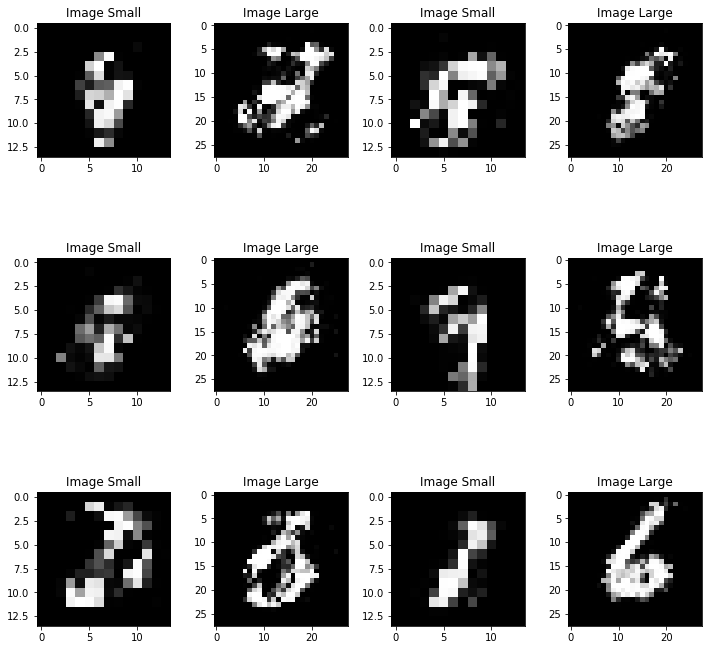

In [3]:
plt.figure(figsize=(10, 10))

for i in range(3):
    plt.subplot(3, 4, 4 * i + 1)
    plt.imshow(np.reshape(samples1[0][i], (14, 14)), vmin=0, vmax=1, interpolation='NONE', cmap=plt.get_cmap('gray'))
    plt.title('Image Small')
    
    plt.subplot(3, 4, 4 * i + 2)
    plt.imshow(np.reshape(samples1[1][i], (28, 28)), vmin=0, vmax=1, interpolation='NONE', cmap=plt.get_cmap('gray'))
    plt.title('Image Large')
    
    plt.subplot(3, 4, 4 * i + 3)
    plt.imshow(np.reshape(samples2[0][i], (14, 14)), vmin=0, vmax=1, interpolation='NONE', cmap=plt.get_cmap('gray'))
    plt.title('Image Small')
    
    plt.subplot(3, 4, 4 * i + 4)
    plt.imshow(np.reshape(samples2[1][i], (28, 28)), vmin=0, vmax=1, interpolation='NONE', cmap=plt.get_cmap('gray'))
    plt.title('Image Large')

plt.tight_layout()